In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv('supermarket_sales.csv',encoding='unicode_escape')

In [121]:
df.shape

(1000, 17)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product type             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Qty                      1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [152]:
pd.isnull(df).sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product type               0
Unit price                 0
Qty                        0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [188]:
df.rename(columns={'Product line':'Product type','Quantity':'Qty'},inplace=True)

In [13]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [75]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product type', 'Unit price', 'Qty', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

## Exploratory Data Analysis

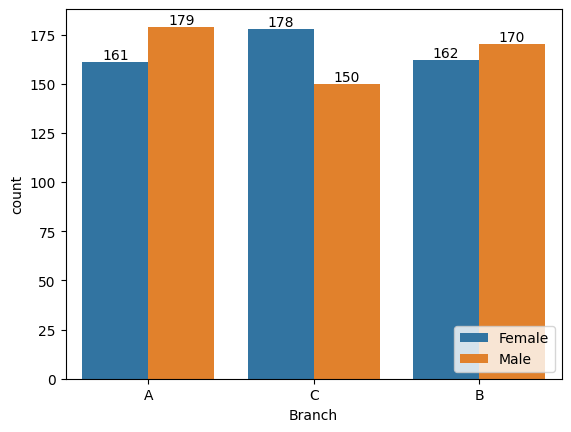

In [89]:
ax=sns.countplot(x='Branch',data=df,hue='Gender')
plt.legend(loc='lower right')
for bars in ax.containers:
    ax.bar_label(bars)

_From above graph we can number of customers gender-wise in each branch._

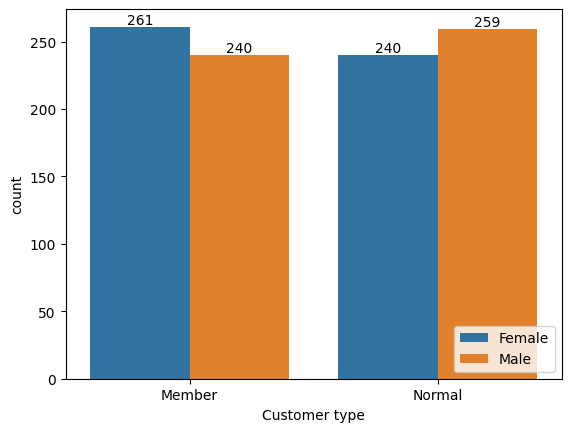

In [109]:
ax=sns.countplot(x='Customer type',data=df,hue='Gender')
plt.legend(loc='lower right')
for bars in ax.containers:
    ax.bar_label(bars)

_From above graph we can tell the number of types of customer gender-wise._

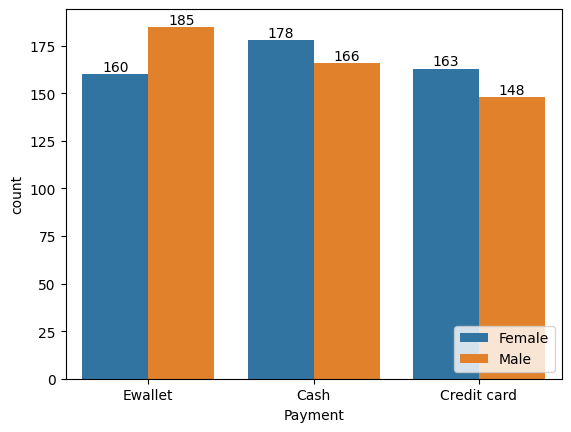

In [73]:
ax=sns.countplot(x='Payment',data=df,hue='Gender')
plt.legend(loc='lower right')
for bars in ax.containers:
    ax.bar_label(bars)

_From the above graph we can tell the number of types of payments used by customer gender-wise._

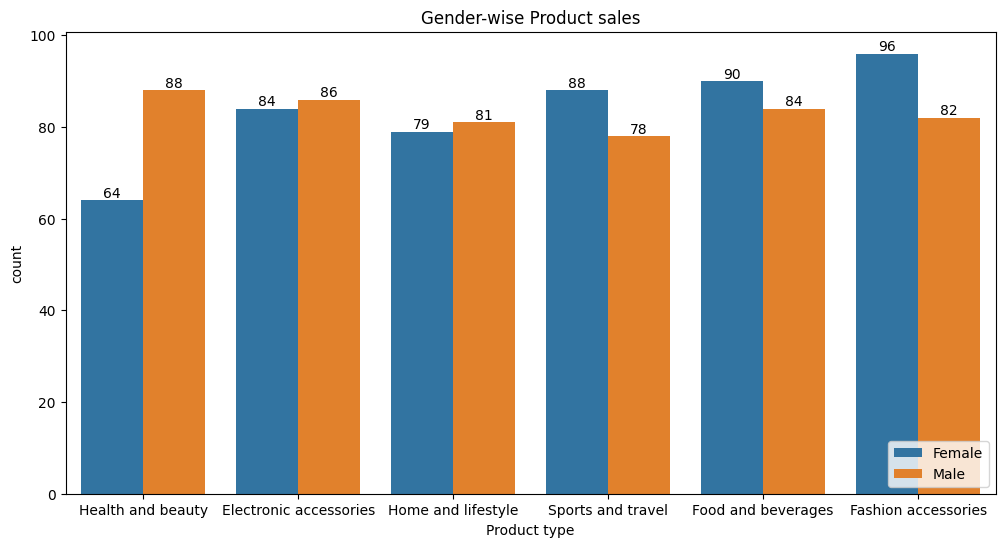

In [198]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Product type',data=df,hue='Gender')
plt.legend(loc='lower right')
plt.title("Gender-wise Product sales")
for bars in ax.containers:
    ax.bar_label(bars)

_From the above graph we can tell the number of types of products bought gender-wise._

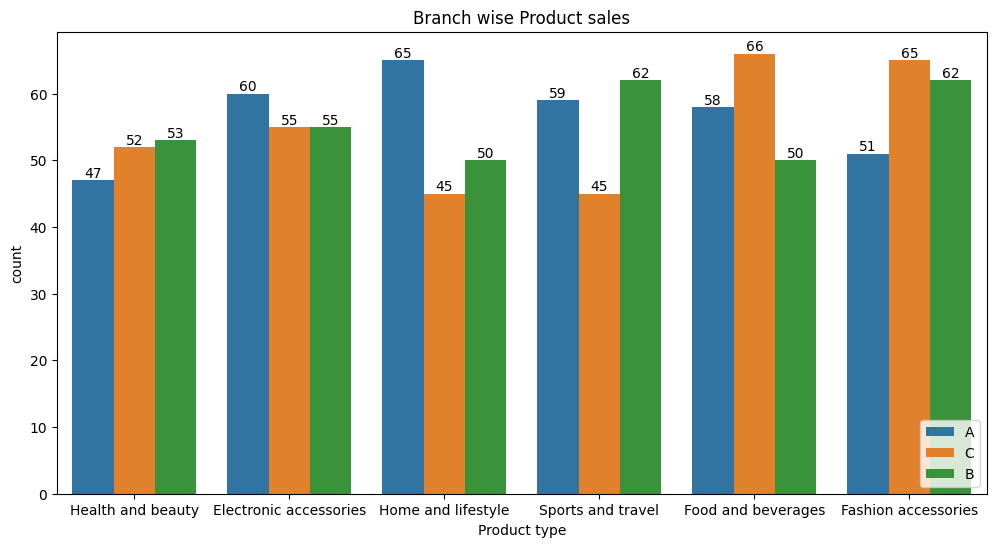

In [200]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='Product type',data=df,hue='Branch')
plt.legend(loc='lower right')
plt.title("Branch wise Product sales")
for bars in ax.containers:
    ax.bar_label(bars)

_From the above graph we can tell the number of types of product branch-wise._

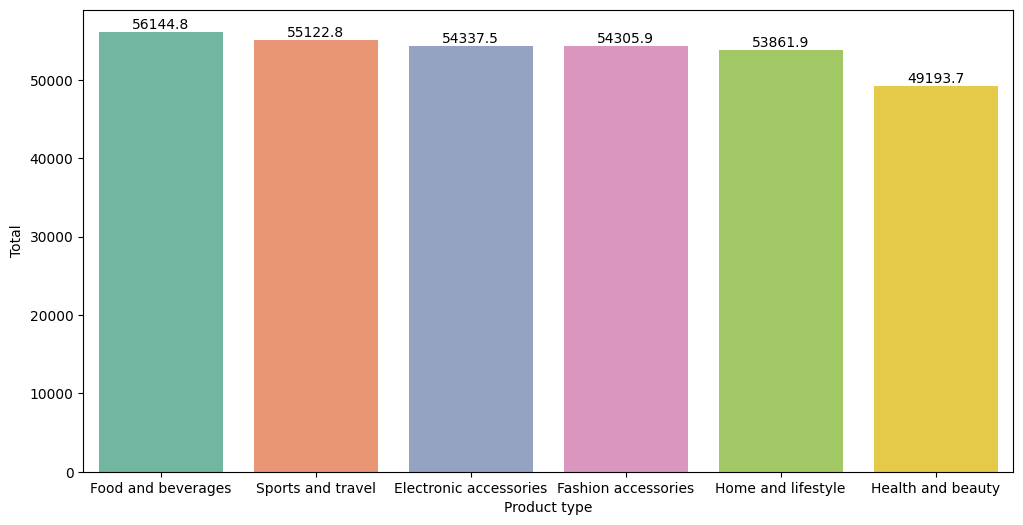

In [178]:
product_type_revenue=df.groupby(['Product type'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Product type',y='Total',data=product_type_revenue,palette='Set2',hue='Product type')
for bars in ax.containers:
    ax.bar_label(bars)

_From the above graph we can tell the total cost of product as per different product type._

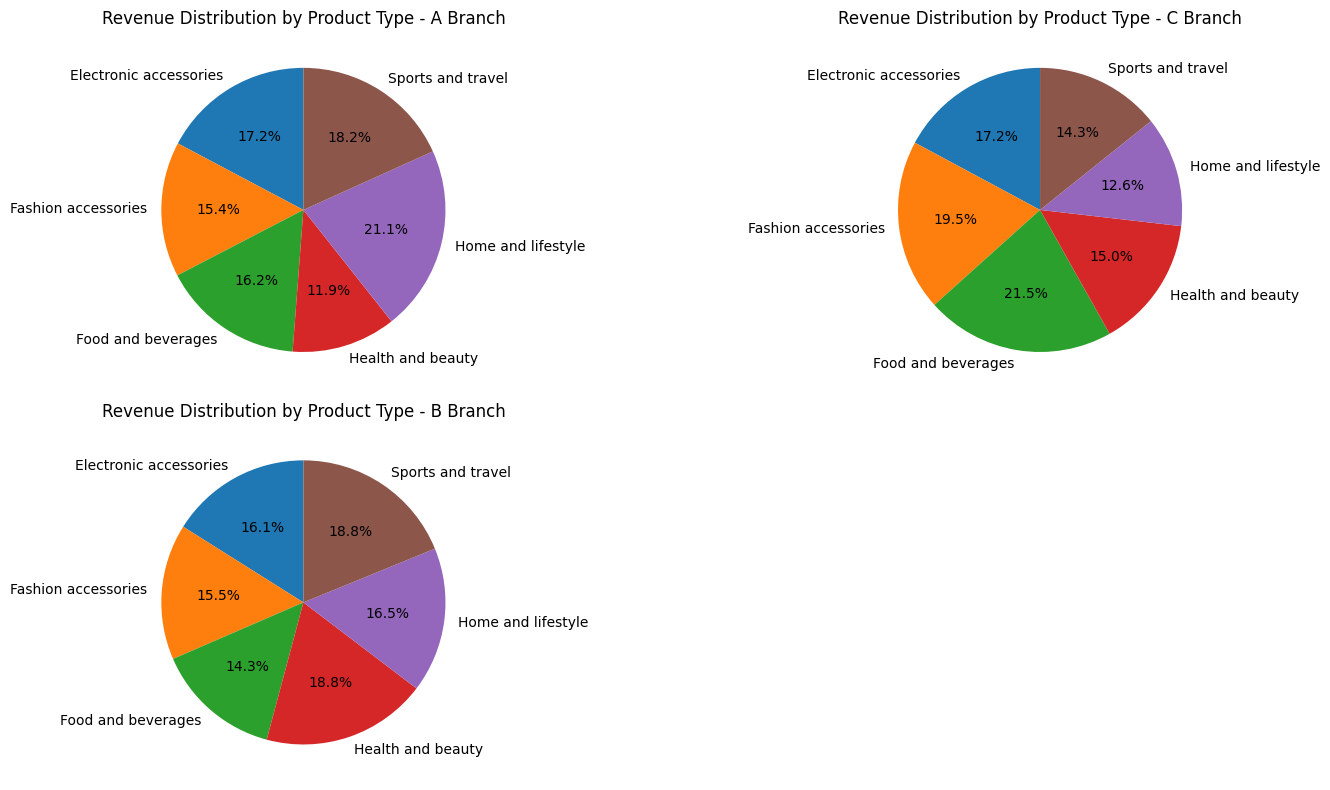

In [184]:
branches = df['Branch'].unique()
num_branches = len(branches)
fig = plt.figure(figsize=(15,8))
for idx, branch in enumerate(branches, 1):
    branch_data = df[df['Branch'] == branch]
    product_totals = branch_data.groupby('Product type')['Total'].sum()
    plt.subplot(((num_branches+1)//2), 2, idx)
    plt.pie(product_totals, labels=product_totals.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Revenue Distribution by Product Type - {branch} Branch')
plt.tight_layout()
plt.show()

_From the above chart we can tell the percent of product brought as per different product type in different branches._

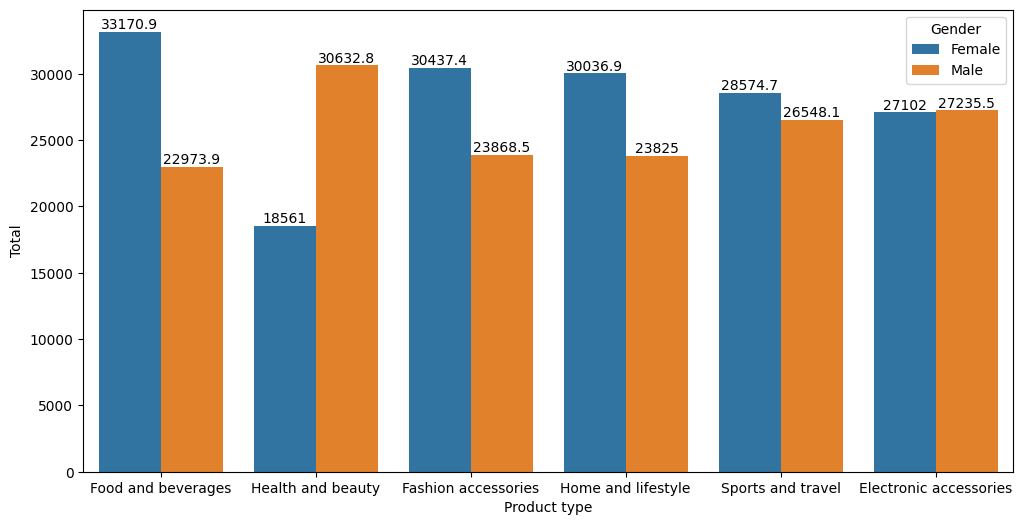

In [120]:
product_type_revenue=df.groupby(['Product type','Gender'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Product type',y='Total',data=product_type_revenue,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

_From the above graph we can tell the total sales as per diffrent product types gender-wise._

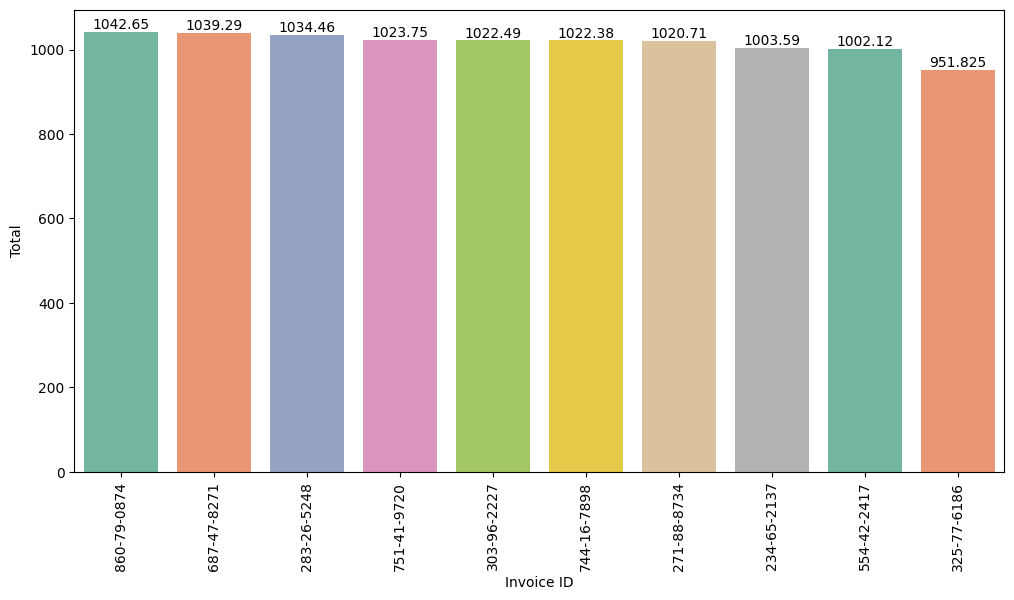

In [186]:
product_type_revenue=df.groupby(['Invoice ID'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False).head(10)
plt.figure(figsize=(12,6))
ax=sns.barplot(x='Invoice ID',y='Total',data=product_type_revenue,palette='Set2',hue='Invoice ID')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)

_From the above graph we can tell the top 10 customers with total purchase._

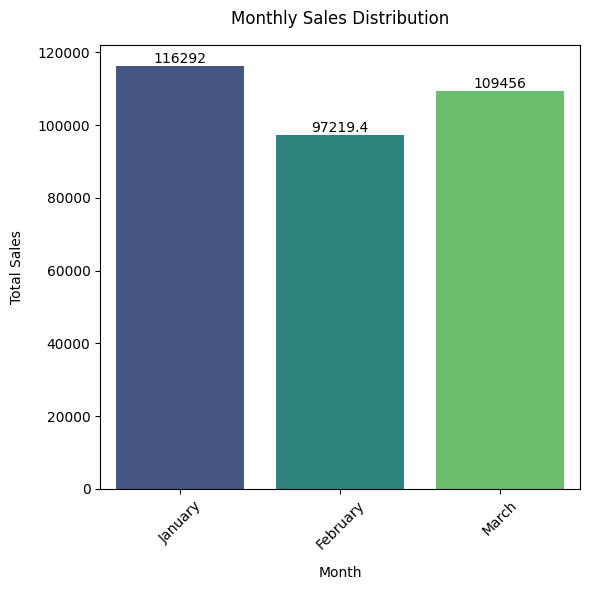

In [196]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.groupby(df['Date'].dt.strftime('%B'))['Total'].sum().reindex(['January', 'February', 'March'])
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis',hue=monthly_sales.index)
plt.title('Monthly Sales Distribution', pad=15, fontsize=12)
plt.xlabel('Month', labelpad=10)
plt.ylabel('Total Sales', labelpad=10)
plt.xticks(rotation=45)
for bars in ax.containers:
    ax.bar_label(bars)
plt.tight_layout()
plt.show()

_From above graph we can tell the monthly sales._